## Something is Wrong with Observation!!

In [1]:
from astropy.visualization import make_lupton_rgb
from astropy.io import fits
from astropy.nddata import Cutout2D, block_reduce
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

from PIL import Image,ImageOps
import os
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
input_image_path = 'C:\\Users\\oryan\\Documents\\chi2-tests\\images\\Arp_256.npy'

In [3]:
input_image = np.load(input_image_path)

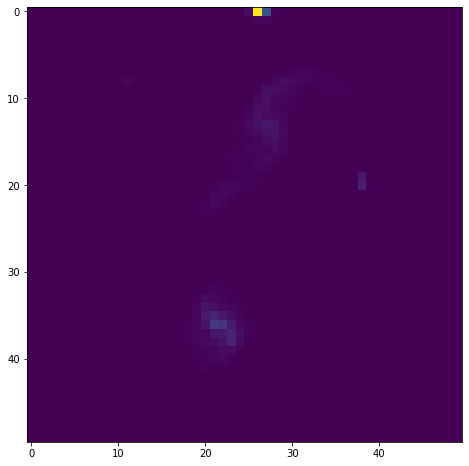

In [4]:
plt.figure(figsize=(12,8))
plt.imshow(input_image)

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


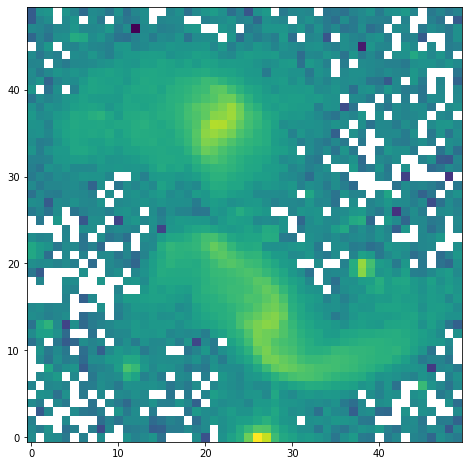

In [8]:
plt.figure(figsize=(12,8))
plt.imshow(np.log10(input_image),origin='lower')

I get all of this extra white space, which is really weird? I'm going to use my cutout code in order to completely remake Arp 256. This has been a complete disaster...

### Getting the Fits Files...

In [6]:
folder = 'C:\\Users\\oryan\\Documents\\Raw_Observational_Data\\Arp_256\\'

In [7]:
fits_paths = glob.glob(folder + '*.fits')

In [8]:
colours = {'u':[],'g':[],'r':[],'i':[],'z':[]}

In [9]:
for i in fits_paths:
    file = os.path.basename(i)
    if file.split('-')[1] in colours:
        colours[file.split('-')[1]].append(i)

In [10]:
u = fits.open(colours['u'][0])[0].data
g = fits.open(colours['g'][0])[0].data
r = fits.open(colours['r'][0])[0].data
i = fits.open(colours['i'][0])[0].data
z = fits.open(colours['z'][0])[0].data

u_hdul = fits.open(colours['u'][0])[0].header
g_hdul = fits.open(colours['g'][0])[0].header
r_hdul = fits.open(colours['r'][0])[0].header
i_hdul = fits.open(colours['i'][0])[0].header
z_hdul = fits.open(colours['z'][0])[0].header

In [11]:
wcs_u = WCS(header=u_hdul)
wcs_g = WCS(header=g_hdul)
wcs_r = WCS(header=r_hdul)
wcs_i = WCS(header=i_hdul)
wcs_z = WCS(header=z_hdul)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [12]:
rgb = [u,g,r,i,z]

In [13]:
wcs = [wcs_u,wcs_g,wcs_r,wcs_i,wcs_z]

In [14]:
position = SkyCoord('00h18m50.5s', '-10d22m09s',frame='icrs')

In [15]:
cutout = np.zeros([300,300,5],'float32')

In [16]:
for i in range(5):
    tmp = Cutout2D(rgb[i],position,(300,300),wcs=wcs[i],mode='partial')
    cutout[:,:,i] = tmp.data

In [17]:
white_image = np.sum(cutout,2)

In [18]:
white_image.shape

(300, 300)

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


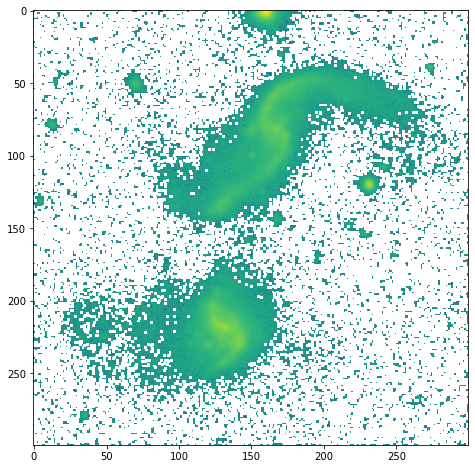

In [19]:
plt.figure(figsize=(12,8))
plt.imshow(np.log10(white_image))

In [20]:
white_image_red = block_reduce(white_image,6)

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


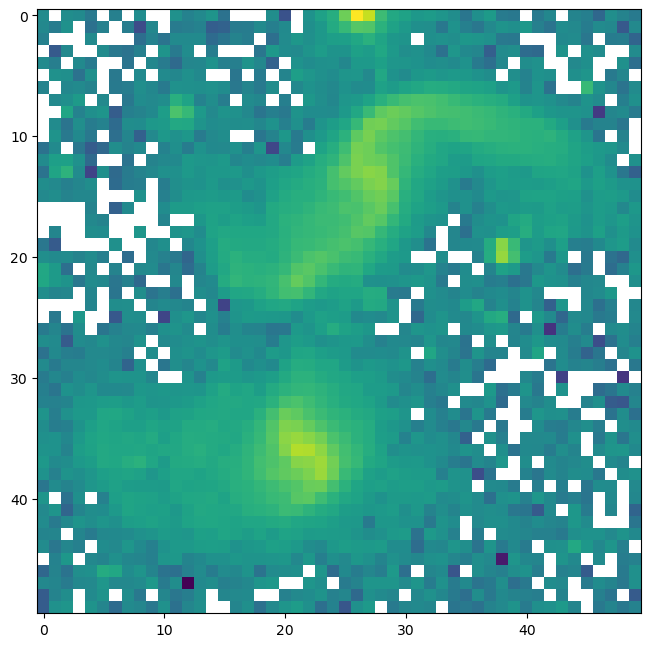

In [21]:
plt.figure(figsize=(12,8),dpi=100)
plt.imshow(np.log10(white_image_red))

In [29]:
white_image_red_SI = white_image_red * 1e-26 * 1e-3

In [30]:
np.save('C:\\Users\\oryan\\Documents\\chi2-tests\\images\\Arp_256.npy',white_image_red_SI)